In [537]:
#Import necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

In [538]:
#Read and clean data
df_original = pd.read_csv('./df_6dB_pump_fe_ta_imb.csv')
df_original.drop(['Unnamed: 0'],axis = 1, inplace = True)
df = df_original.drop(['target'],axis = 1)

In [539]:
df.head()

,mfccs,zero_cross,rms,machine_type
0,-20.094755,0.115225,0.004198,id_00
1,-20.305080,0.116652,0.004173,id_00
2,-23.708408,0.132485,0.004153,id_00
3,-19.761568,0.114871,0.004256,id_00
4,-22.823303,0.119632,0.004106,id_00


In [540]:
df.machine_type.unique()

array(['id_00', 'id_02', 'id_04', 'id_06'], dtype=object)

In [541]:
df_00 = df[df.machine_type == 'id_00']
df_00.reset_index()
df_00.drop(['machine_type'],axis = 1, inplace = True) 

df_02 = df[df.machine_type == 'id_02']
df_02.reset_index()
df_02.drop(['machine_type'],axis = 1, inplace = True) 

df_04 = df[df.machine_type == 'id_04']
df_04.reset_index()
df_04.drop(['machine_type'],axis = 1, inplace = True) 

df_06 = df[df.machine_type == 'id_06']
df_06.reset_index()
df_06.drop(['machine_type'],axis = 1, inplace = True) 

c:\users\kasia\pyproj\machine-monitoring-conditions-unsupervised\my_env\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [542]:
df_00.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 3891
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mfccs       1149 non-null   float64
 1   zero_cross  1149 non-null   float64
 2   rms         1149 non-null   float64
dtypes: float64(3)
memory usage: 35.9 KB


In [543]:
df_00.head()

,mfccs,zero_cross,rms
0,-20.094755,0.115225,0.004198
1,-20.305080,0.116652,0.004173
2,-23.708408,0.132485,0.004153
3,-19.761568,0.114871,0.004256
4,-22.823303,0.119632,0.004106


# Z-score normalisation per machine_id

In [544]:
# z-score normalisation per machine
metrics_normalized_00 =(df_00-df_00.mean())/df_00.std()
metrics_normalized_00 = metrics_normalized_00.rename(columns={'mfccs': 'mfccs00_zscore',
                                                        'zero_cross': 'zero_cross00_zscore',
                                                        'rms': 'rms00_zscore'})

In [545]:
metrics_normalized_00.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 3891
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   mfccs00_zscore       1149 non-null   float64
 1   zero_cross00_zscore  1149 non-null   float64
 2   rms00_zscore         1149 non-null   float64
dtypes: float64(3)
memory usage: 35.9 KB


# K means per machine_id

In [546]:
# fit a kmeans object to the dataset
kmeans = KMeans(n_clusters=3, init='k-means++').fit(metrics_normalized_00)

# clusters is an attribute of the object
cluster_centers = kmeans.cluster_centers_

# add cluster index to dataframe
cluster_labels = pd.Series(kmeans.labels_, name='cluster')
metrics_normalized_00 = metrics_normalized_00.join(cluster_labels.to_frame())

In [547]:
metrics_normalized_00.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 3891
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   mfccs00_zscore       1149 non-null   float64
 1   zero_cross00_zscore  1149 non-null   float64
 2   rms00_zscore         1149 non-null   float64
 3   cluster              1006 non-null   float64
dtypes: float64(4)
memory usage: 77.2 KB


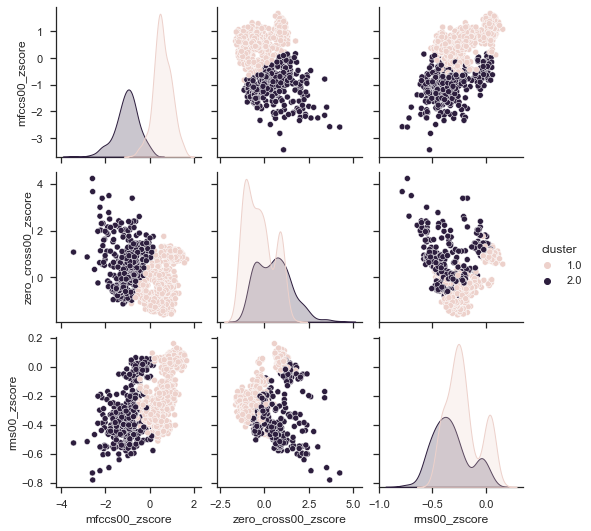

In [548]:
sns.set_theme(style="ticks")

df = metrics_normalized_00
sns.pairplot(df, hue="cluster")

In [556]:
import plotly.express as px
import plotly.io as pio
pio.templates


df = metrics_normalized_00
fig = px.scatter_3d(df, x='mfccs00_zscore', y='zero_cross00_zscore', z='rms00_zscore',
              color=kmeans.labels_, symbol = 'target', template = 'presentation', width=800, height=800,  labels={"target": "Abnormal"})
fig.show()

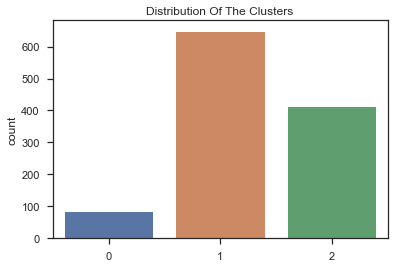

In [551]:
#Plotting countplot of clusters
pl = sns.countplot(x=kmeans.labels_)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [552]:
df_00_label = pd.read_csv('./df_6dB_valve_fe_ta_imb.csv')
df_00_label = df_00 = df_00_label[df_00_label.machine_type == 'id_00']
df_00_label.reset_index()

,index,Unnamed: 0,mfccs,zero_cross,rms,target,machine_type
0,0,0,-22.868465,0.060725,0.002967,1,id_00
1,1,1,-23.219486,0.094482,0.002920,1,id_00
2,2,2,-24.831755,0.094802,0.002680,1,id_00
3,3,3,-23.171322,0.071383,0.002953,1,id_00
4,4,4,-23.345182,0.053385,0.002925,1,id_00
...,...,...,...,...,...,...,...
1105,3805,114,-23.098116,0.052347,0.002500,0,id_00
1106,3806,115,-22.548649,0.039601,0.002459,0,id_00
1107,3807,116,-21.984026,0.065946,0.002431,0,id_00
1108,3808,117,-24.097553,0.044771,0.002447,0,id_00


In [553]:
metrics_normalized_00['target'] = df_original[df_original.machine_type == 'id_00'].target

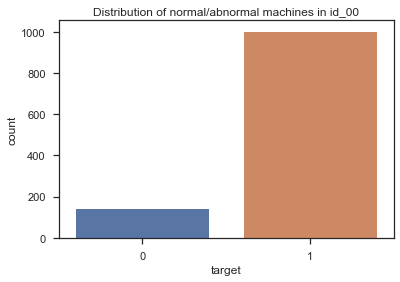

In [554]:
#Plotting countplot of normal/abnormal machines in id_00
pl = sns.countplot(x=metrics_normalized_00['target'])
pl.set_title("Distribution of normal/abnormal machines in id_00")
plt.show()

In [555]:
metrics_normalized_00.head()

,mfccs00_zscore,zero_cross00_zscore,rms00_zscore,cluster,target
0,0.938239,1.216322,-0.026921,1.0,1
1,0.802305,1.294111,-0.040735,1.0,1
2,-1.397287,2.157643,-0.051201,2.0,1
3,1.153580,1.196982,0.004100,1.0,1
4,-0.825238,1.456672,-0.076403,2.0,1
